# 代码

In [1]:
from name_exist import *

# 超参数

In [2]:
args = {
    'domain': 'ktea.com',
    'option_lsh': 'ssdeep',  # 使用LSH算法评估网页相似度: ssdeep
    'threads': 30,
    'dns_type': 1,
    'fuzzer_num': 1000 , # 0-np.inf，inf代表输出所有的生成结果
    'threshold_value': 0.15,
    'tld_all': True,
    'fuzzers': [
#         'bitsquatting', 'vowel-swap', 'cyrillic', 'homoglyph', 'repetition','various'
        'addition',
        'hyphenation',
        'insertion', 'omission', 'replacement',
        'subdomain', 'transposition'
    ],
    'useragent': USER_AGENT_STRING,
    'request_timeout_http': 1.5
}

# 主程序

In [3]:
import time

t1=time.time()
url = UrlParser(args['domain'])
fuzz = fuzzer_plus.Fuzzer(domain=url.domain, tld_all=args['tld_all'], threshold_value=args['threshold_value'],
                          top=args['fuzzer_num'])
fuzz.generate(args['fuzzers'])
domains = list(fuzz.domains_tld)
len_fuzz=len(domains)

In [4]:
pd.DataFrame(domains)

,fuzzer,domain,score
0,addition,ketea.com,1.921928
1,addition,kteat.com,1.921928
2,addition,tktea.com,1.921928
3,addition,kteka.com,1.921928
4,addition,kttea.com,1.921928
...,...,...,...
4307,tld-swap,ktpa.org,3.000000
4308,tld-swap,take.org,3.000000
4309,tld-swap,kte6.org,3.000000
4310,tld-swap,kte4.org,3.000000


In [5]:
_ = min(args['fuzzer_num'], len(domains))
domains = domains[:_].copy()
t2=time.time()
print("Fuzzer耗时：{:.2f}s".format(t2-t1))

Fuzzer耗时：2.83s


In [6]:
# t3=time.time()
# domains = search_status_code(domains, args['request_timeout_http'], args['threads'])
save_domains(domains, "{}生成的混淆域名".format(url.domain))
# t4=time.time()
# print("request发包过滤耗时：{:.2f}s".format(t4-t3))

文件：D:\Desktop\上班\dnstwist-20230509\Similar_domain_name_detection\example\file\ktea.com生成的混淆域名.csv保存成功


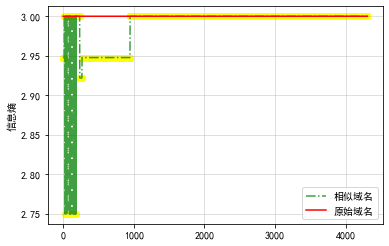

In [7]:
fuzz._make_fig(url.domain)

In [8]:
# domains = search_dns(domains, _type=args['dns_type'], tnum=args['threads'])
# save_domains(domains, "DNS过滤后的混淆域名")

In [9]:
t5=time.time()
domains=search_whois(domains,args['threads'])
# domains = LSH_alg(args['domain'], domains, args['request_timeout_http'], args['useragent'], args['option_lsh'])
save_domains(domains, "{}whois过滤后的混淆域名".format(url.domain))
t6=time.time()
len_lsh=len(domains)

Error trying to connect to socket: closing socket - [Errno 11001] getaddrinfo failed
Error trying to connect to socket: closing socket - [Errno 11001] getaddrinfo failed
Error trying to connect to socket: closing socket - [Errno 11002] getaddrinfo failed
Error trying to connect to socket: closing socket - [Errno 11001] getaddrinfo failed
Error trying to connect to socket: closing socket - [Errno 11001] getaddrinfo failed
<< {'fuzzer': 'tld-swap', 'domain': 'aktea.org', 'score': 2.94770277922009, 'whois_domain_name': datetime.datetime(2024, 6, 17, 22, 53, 8)}
<< {'fuzzer': 'addition', 'domain': 'ketea.com', 'score': 1.9219280948873623, 'whois_domain_name': datetime.datetime(2025, 2, 16, 6, 5, 51)}
<< {'fuzzer': 'addition', 'domain': 'taek.com', 'score': 2.0, 'whois_domain_name': datetime.datetime(2025, 4, 10, 4, 0)}
<< {'fuzzer': 'replacement', 'domain': 'kgea.com', 'score': 2.0, 'whois_domain_name': [datetime.datetime(2025, 10, 31, 19, 13, 6), datetime.datetime(2025, 10, 31, 14, 13, 6)

Error trying to connect to socket: closing socket - [Errno 11001] getaddrinfo failed
Error trying to connect to socket: closing socket - [Errno 11001] getaddrinfo failed
Error trying to connect to socket: closing socket - [Errno 11001] getaddrinfo failed
Error trying to connect to socket: closing socket - [Errno 11001] getaddrinfo failed
Error trying to connect to socket: closing socket - [Errno 11001] getaddrinfo failed
Error trying to connect to socket: closing socket - [Errno 11001] getaddrinfo failed
Error trying to connect to socket: closing socket - [Errno 11001] getaddrinfo failed
Error trying to connect to socket: closing socket - [Errno 11001] getaddrinfo failed
Error trying to connect to socket: closing socket - [Errno 11001] getaddrinfo failed
Error trying to connect to socket: closing socket - [Errno 11001] getaddrinfo failed
Error trying to connect to socket: closing socket - [Errno 11001] getaddrinfo failed
Error trying to connect to socket: closing socket - [Errno 11001]

In [10]:
pd.DataFrame(domains)

,fuzzer,domain,score,whois_domain_name
0,tld-swap,aktea.org,2.947703,2024-06-17 22:53:08
1,addition,ketea.com,1.921928,2025-02-16 06:05:51
2,addition,taek.com,2.000000,2025-04-10 04:00:00
3,replacement,kgea.com,2.000000,"[2025-10-31 19:13:06, 2025-10-31 14:13:06]"
4,replacement,kte1.com,2.000000,2023-08-24 05:25:21
5,addition,0tea.com,2.000000,"[2023-12-25 19:30:53, 2023-12-26 03:30:53]"
6,addition,kjea.com,2.000000,"[2024-09-09 03:02:48, 2024-09-08 22:02:48]"
7,addition,2tea.com,2.000000,"[2024-04-21 14:08:46, 2024-04-21 09:08:46]"
8,tld-swap,kteea.Org,2.947703,2023-10-24 13:15:06
9,tld-swap,ketea.ORG,2.947703,2024-01-02 15:21:35


In [11]:
print("whois过滤过滤耗时：{:.2f}s".format(t6-t5))

LSH过滤过滤耗时：167.53s


In [12]:
sum_time=t6-t1
print("共计耗时：{:.2f}s".format(t6-t1))

共计耗时：174.43s
